In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = pd.read_csv('NYM_Team_Data.csv')

In [3]:
path.head()

,Year,Tm,Lg,G,W,L,Ties,W-L%,pythW-L%,Finish,...,Playoffs,R,RA,Attendance,BatAge,PAge,#Bat,#P,Top Player,Managers
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.0,New York Mets,NL East,162.0,77.0,85.0,0.0,0.475,0.478,3rd of 5,...,NaN,636.0,668.0,1511926.0,28.2,29.5,64.0,42.0,J.deGrom (5.0),L.Rojas (77-85)
2,2020.0,New York Mets,NL East,60.0,26.0,34.0,0.0,0.433,0.466,4th of 5,...,NaN,286.0,308.0,NaN,27.7,29.2,47.0,25.0,J.deGrom (2.7),L.Rojas (26-34)
3,2019.0,New York Mets,NL East,162.0,86.0,76.0,0.0,0.531,0.532,3rd of 5,...,NaN,791.0,737.0,2442532.0,27.9,28.6,53.0,30.0,J.deGrom (8.4),M.Callaway (86-76)
4,2018.0,New York Mets,NL East,162.0,77.0,85.0,0.0,0.475,0.479,4th of 5,...,NaN,676.0,707.0,2224995.0,28.4,28.0,56.0,30.0,J.deGrom (10.4),M.Callaway (77-85)


In [4]:
df = path.drop([0])

In [5]:
df.head()
    

,Year,Tm,Lg,G,W,L,Ties,W-L%,pythW-L%,Finish,...,Playoffs,R,RA,Attendance,BatAge,PAge,#Bat,#P,Top Player,Managers
1,2021.0,New York Mets,NL East,162.0,77.0,85.0,0.0,0.475,0.478,3rd of 5,...,NaN,636.0,668.0,1511926.0,28.2,29.5,64.0,42.0,J.deGrom (5.0),L.Rojas (77-85)
2,2020.0,New York Mets,NL East,60.0,26.0,34.0,0.0,0.433,0.466,4th of 5,...,NaN,286.0,308.0,NaN,27.7,29.2,47.0,25.0,J.deGrom (2.7),L.Rojas (26-34)
3,2019.0,New York Mets,NL East,162.0,86.0,76.0,0.0,0.531,0.532,3rd of 5,...,NaN,791.0,737.0,2442532.0,27.9,28.6,53.0,30.0,J.deGrom (8.4),M.Callaway (86-76)
4,2018.0,New York Mets,NL East,162.0,77.0,85.0,0.0,0.475,0.479,4th of 5,...,NaN,676.0,707.0,2224995.0,28.4,28.0,56.0,30.0,J.deGrom (10.4),M.Callaway (77-85)
5,2017.0,New York Mets,NL East,162.0,70.0,92.0,0.0,0.432,0.427,4th of 5,...,NaN,735.0,863.0,2460622.0,28.9,27.5,52.0,29.0,J.deGrom (4.6),T.Collins (70-92)


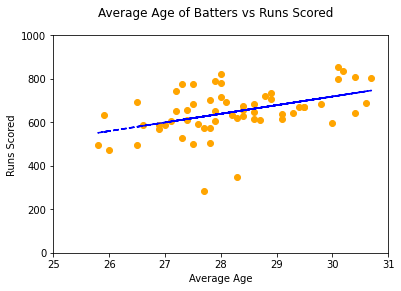

In [25]:
plt.scatter(df['BatAge'], df['R'], color = 'orange')
z = np.polyfit(df['BatAge'], df['R'], 1)
p = np.poly1d(z)
plt.plot(df['BatAge'], p(df['BatAge']), "b--")
plt.suptitle('Average Age of Batters vs Runs Scored')
plt.xlabel('Average Age'); plt.ylabel('Runs Scored')
plt.xlim(25, 31); plt.ylim(0, 1000)

plt.show()

In [7]:
df[['BatAge', 'R']].describe()

,BatAge,R
count,60.000000,60.000000
mean,28.216667,647.816667
std,1.213786,108.540626
min,25.800000,286.000000
25%,27.400000,597.500000
50%,28.000000,648.000000
75%,28.950000,703.750000
max,30.700000,853.000000


Given that the NYM scored more than 650 runs in a partciular season, what's the probability that the average age of the batters during that season is less than 28?

Bayes Theorem: P(A|B) = P(A)P(B|A)/P(B)
P(B) = Probability of NYM scoring more than 650 runs = 29/60
P(A) = Probability that average age of batters is less than 28 = 7/15
P(B|A) = Probability that NYM scored more than 650 runs given the average age of batters is less than 28 = 3/20

In [8]:
df.shape #60 total seasons in NYM history

(60, 21)

In [9]:
batters_under_28 = df.query('BatAge < 28')

In [10]:
batters_under_28

,Year,Tm,Lg,G,W,L,Ties,W-L%,pythW-L%,Finish,...,Playoffs,R,RA,Attendance,BatAge,PAge,#Bat,#P,Top Player,Managers
2,2020.0,New York Mets,NL East,60.0,26.0,34.0,0.0,0.433,0.466,4th of 5,...,NaN,286.0,308.0,NaN,27.7,29.2,47.0,25.0,J.deGrom (2.7),L.Rojas (26-34)
3,2019.0,New York Mets,NL East,162.0,86.0,76.0,0.0,0.531,0.532,3rd of 5,...,NaN,791.0,737.0,2442532.0,27.9,28.6,53.0,30.0,J.deGrom (8.4),M.Callaway (86-76)
10,2012.0,New York Mets,NL East,162.0,74.0,88.0,0.0,0.457,0.460,4th of 5,...,NaN,650.0,709.0,2242803.0,27.9,30.3,49.0,28.0,D.Wright (7.1),T.Collins (74-88)
25,1997.0,New York Mets,NL East,162.0,88.0,74.0,0.0,0.543,0.542,3rd of 5,...,NaN,777.0,709.0,1766174.0,27.3,29.4,45.0,21.0,E.Alfonzo (6.2),B.Valentine (88-74)
26,1996.0,New York Mets,NL East,162.0,71.0,91.0,0.0,0.438,0.480,4th of 5,...,NaN,746.0,779.0,1588323.0,27.2,27.4,40.0,17.0,B.Gilkey (8.1),D.Green (59-72) and B.Valentine (12-19)
27,1995.0,New York Mets,NL East,144.0,69.0,75.0,0.0,0.479,0.528,2nd of 5,...,NaN,657.0,618.0,1273183.0,27.4,27.2,45.0,22.0,J.Kent (3.2),D.Green (69-75)
28,1994.0,New York Mets,NL East,113.0,55.0,58.0,0.0,0.487,0.482,3rd of 5,...,NaN,506.0,526.0,1151471.0,27.8,28.6,37.0,18.0,B.Saberhagen (5.7),D.Green (55-58)
32,1990.0,New York Mets,NL East,162.0,91.0,71.0,0.0,0.562,0.606,2nd of 6,...,NaN,775.0,613.0,2732745.0,27.5,28.0,44.0,15.0,D.Strawberry (6.3),D.Johnson (20-22) and B.Harrelson (71-49)
33,1989.0,New York Mets,NL East,162.0,87.0,75.0,0.0,0.537,0.563,2nd of 6,...,NaN,683.0,595.0,2918710.0,27.5,27.5,42.0,20.0,H.Johnson (6.9),D.Johnson (87-75)
34,1988.0,New York Mets,NL East,160.0,100.0,60.0,0.0,0.625,0.625,1st of 6,...,Lost NLCS (4-3),703.0,532.0,3055445.0,27.8,26.6,32.0,15.0,D.Cone (5.7),D.Johnson (100-60)


In [11]:
batters_under_28.shape #28 seasons IN NYM history with the average age of batters being lower than 28, p = 7/15

(28, 21)

In [12]:
28/60

0.4666666666666667

The probability that the New York Mets batters have an average age under 28 is 7/15

In [13]:
runs_above_650 = df.query('R > 650')

In [14]:
runs_above_650.head()

,Year,Tm,Lg,G,W,L,Ties,W-L%,pythW-L%,Finish,...,Playoffs,R,RA,Attendance,BatAge,PAge,#Bat,#P,Top Player,Managers
3,2019.0,New York Mets,NL East,162.0,86.0,76.0,0.0,0.531,0.532,3rd of 5,...,NaN,791.0,737.0,2442532.0,27.9,28.6,53.0,30.0,J.deGrom (8.4),M.Callaway (86-76)
4,2018.0,New York Mets,NL East,162.0,77.0,85.0,0.0,0.475,0.479,4th of 5,...,NaN,676.0,707.0,2224995.0,28.4,28.0,56.0,30.0,J.deGrom (10.4),M.Callaway (77-85)
5,2017.0,New York Mets,NL East,162.0,70.0,92.0,0.0,0.432,0.427,4th of 5,...,NaN,735.0,863.0,2460622.0,28.9,27.5,52.0,29.0,J.deGrom (4.6),T.Collins (70-92)
6,2016.0,New York Mets,NL East,162.0,87.0,75.0,0.0,0.537,0.538,2nd of 5,...,Lost NLWC (1-0),671.0,617.0,2789602.0,29.5,28.4,46.0,22.0,N.Syndergaard (5.7),T.Collins (87-75)
7,2015.0,New York Mets,NL East,162.0,90.0,72.0,0.0,0.556,0.549,1st of 5,...,Lost WS (4-1),683.0,613.0,2569753.0,28.6,28.2,49.0,26.0,J.deGrom (5.5),T.Collins (90-72)


In [15]:
batters_under_28_and_more_than_650_runs_scored = batters_under_28.query('R > 650')

In [16]:
batters_under_28_and_more_than_650_runs_scored.head()

,Year,Tm,Lg,G,W,L,Ties,W-L%,pythW-L%,Finish,...,Playoffs,R,RA,Attendance,BatAge,PAge,#Bat,#P,Top Player,Managers
3,2019.0,New York Mets,NL East,162.0,86.0,76.0,0.0,0.531,0.532,3rd of 5,...,NaN,791.0,737.0,2442532.0,27.9,28.6,53.0,30.0,J.deGrom (8.4),M.Callaway (86-76)
25,1997.0,New York Mets,NL East,162.0,88.0,74.0,0.0,0.543,0.542,3rd of 5,...,NaN,777.0,709.0,1766174.0,27.3,29.4,45.0,21.0,E.Alfonzo (6.2),B.Valentine (88-74)
26,1996.0,New York Mets,NL East,162.0,71.0,91.0,0.0,0.438,0.480,4th of 5,...,NaN,746.0,779.0,1588323.0,27.2,27.4,40.0,17.0,B.Gilkey (8.1),D.Green (59-72) and B.Valentine (12-19)
27,1995.0,New York Mets,NL East,144.0,69.0,75.0,0.0,0.479,0.528,2nd of 5,...,NaN,657.0,618.0,1273183.0,27.4,27.2,45.0,22.0,J.Kent (3.2),D.Green (69-75)
32,1990.0,New York Mets,NL East,162.0,91.0,71.0,0.0,0.562,0.606,2nd of 6,...,NaN,775.0,613.0,2732745.0,27.5,28.0,44.0,15.0,D.Strawberry (6.3),D.Johnson (20-22) and B.Harrelson (71-49)


In [17]:
batters_under_28_and_more_than_650_runs_scored.shape #9 seasons in NYM history with more than 650 runs scored and average batter age less than 28, p=3/20

(9, 21)

In [18]:
runs_above_650.shape #29 seasons in NYM history with more than 650 runs scored, p=29/60

(29, 21)

In [19]:
def bayes_ball1():
    p_b = 29 / 60
    p_a = 7 / 15
    p_b_given_a = 3/20
    prob = (p_a * p_b_given_a) / p_b
    return f'Given that the NYM scored more than 650 runs in a partciular season, the probability that the average age of the batters during that season is less than 28 is {prob}.'

In [20]:
bayes_ball()

'Given that the NYM scored more than 650 runs in a partciular season, the probability that the average age of the batters during that season is less than 28 is 0.14482758620689654.'

In [21]:
9/60

0.15

(0.25, 0.75)

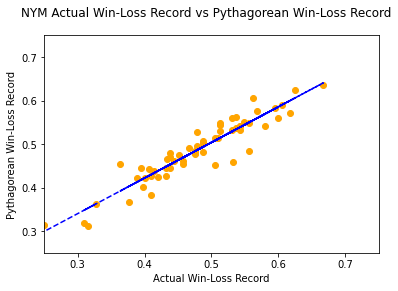

In [41]:
plt.scatter(df['W-L%'], df['pythW-L%'], color = 'orange')
z = np.polyfit(df['W-L%'], df['pythW-L%'], 1)
p = np.poly1d(z)
plt.plot(df['W-L%'], p(df['W-L%']), "b--")
plt.suptitle('NYM Actual Win-Loss Record vs Pythagorean Win-Loss Record')
plt.xlabel('Actual Win-Loss Record'); plt.ylabel('Pythagorean Win-Loss Record')
plt.xlim(0.25, 0.75); plt.ylim(0.25, 0.75)

Given that the Actual Win-Loss proportion exceeds the Pythagorean Win-Loss proportion, what's the probability that the New York Mets make the playoffs?

Bayes Theorem: P(A|B) = P(A)P(B|A)/P(B)
P(B) = NYM Actual Record better than Expected Record = 7/20
p(A) = NYM make the playoffs! = 3/20
p(B|A) = Given NYM makes the playoffs, what's the probability that their actual record was better than their expected record? = 1

In [57]:
df2 = df.rename({'W-L%' : 'Record', 'pythW-L%' : "ExpRecord"}, axis=1) #21 seasons where NYM outperformed pythagorean record
df2.head()

,Year,Tm,Lg,G,W,L,Ties,Record,ExpRecord,Finish,...,Playoffs,R,RA,Attendance,BatAge,PAge,#Bat,#P,Top Player,Managers
1,2021.0,New York Mets,NL East,162.0,77.0,85.0,0.0,0.475,0.478,3rd of 5,...,NaN,636.0,668.0,1511926.0,28.2,29.5,64.0,42.0,J.deGrom (5.0),L.Rojas (77-85)
2,2020.0,New York Mets,NL East,60.0,26.0,34.0,0.0,0.433,0.466,4th of 5,...,NaN,286.0,308.0,NaN,27.7,29.2,47.0,25.0,J.deGrom (2.7),L.Rojas (26-34)
3,2019.0,New York Mets,NL East,162.0,86.0,76.0,0.0,0.531,0.532,3rd of 5,...,NaN,791.0,737.0,2442532.0,27.9,28.6,53.0,30.0,J.deGrom (8.4),M.Callaway (86-76)
4,2018.0,New York Mets,NL East,162.0,77.0,85.0,0.0,0.475,0.479,4th of 5,...,NaN,676.0,707.0,2224995.0,28.4,28.0,56.0,30.0,J.deGrom (10.4),M.Callaway (77-85)
5,2017.0,New York Mets,NL East,162.0,70.0,92.0,0.0,0.432,0.427,4th of 5,...,NaN,735.0,863.0,2460622.0,28.9,27.5,52.0,29.0,J.deGrom (4.6),T.Collins (70-92)


In [56]:
df['Playoffs'].count()

9

In [58]:
df2['Playoffs'].count()

9

In [59]:
def bayes_ball2():
    p_b = 7 / 20
    p_a = 3 / 20
    p_b_given_a = 1
    prob = (p_a * p_b_given_a) / p_b
    return f'Given the New York Mets made the playoffs, the probability that their actual record was better than their expected record is {prob}.'

In [60]:
bayes_ball2()

'Given the New York Mets made the playoffs, the probability that their actual record was better than their expected record is 0.4285714285714286.'